In [1]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm

In [2]:
TRAIN_DIR = 'D:/machine learning AZ/cat dogs/train'
TEST_DIR = 'D:/machine learning AZ/cat dogs/test'
IMG_SIZE = 50 #shrinking image size to 50 x 50
LR = 1e-3 #0.001 #learning rate

In [3]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return 0
    elif word_label == 'dog': return 1

In [4]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('D:/machine learning AZ/cat dogs/train_data.npy', training_data)
    return training_data

In [5]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('D:/machine learning AZ/cat dogs/test_data.npy', testing_data)
    return testing_data

In [7]:
#train_data = create_train_data()
# If you have already created the dataset:
train_data = np.load('D:/machine learning AZ/cat dogs/train_data.npy')

In [8]:
train_data[0]

array([array([[188, 188, 194, ..., 215, 182, 178],
       [161, 191, 190, ..., 220, 178, 171],
       [ 26,  54,  89, ..., 221, 179, 168],
       ...,
       [ 57,  62,  46, ..., 246, 246, 246],
       [ 59,  70,  61, ..., 246, 245, 244],
       [ 77,  57,  62, ..., 246, 246, 244]], dtype=uint8),
       array(0)], dtype=object)

In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

In [13]:
# Initialising the CNN
classifier = Sequential()

In [14]:
# Step 1 - Convolution
classifier.add(Conv2D(32, 3, 3, input_shape = (IMG_SIZE,IMG_SIZE,1), activation = 'relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(50, 50, 1..., activation="relu")`
  


In [15]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [16]:
# Adding a second convolutional layer
classifier.add(Conv2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(128, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(128, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  


In [17]:
# Step 3 - Flattening
classifier.add(Flatten())

In [18]:
# Step 4 - Full connection
classifier.add(Dense(output_dim = 256, activation = 'relu')) #hidden layer

classifier.add(Dropout(0.5))

classifier.add(Dense(output_dim = 256, activation = 'relu')) #hidden layer

classifier.add(Dropout(0.5))

classifier.add(Dense(output_dim = 256, activation = 'relu')) #hidden layer

classifier.add(Dropout(0.5))

classifier.add(Dense(1, activation='sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  # Remove the CWD from sys.path while we load stuff.


In [19]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
train = train_data[:-500]
test = train_data[-500:]

In [21]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

In [57]:
np.array(Y)

array([0, 0, 1, ..., 0, 0, 0])

In [22]:
import time

start_time = time.time()

nb_epoch = 10
batch_size = 16

classifier.fit(np.array(X), np.array(Y), batch_size=batch_size, nb_epoch=nb_epoch,
              validation_split=0.25, verbose=0, shuffle=True)

print("--- %s seconds ---" % (time.time() - start_time))

C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


--- 1364.4361698627472 seconds ---


In [23]:
predictions = classifier.predict(test_x, verbose=0)

In [24]:
p = np.where(predictions > 0.5, 1, 0)

In [25]:
test_data = process_test_data()

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:30<00:00, 416.65it/s]


In [26]:
X_test = np.array([i[0] for i in test_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [75]:
X_test.shape

(12500, 50, 50, 1)

In [27]:
predictionsTest = classifier.predict(X_test, verbose=0)

this is dog with 86.67  percent probablity


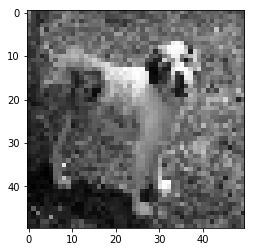

this is dog with 37.84  percent probablity


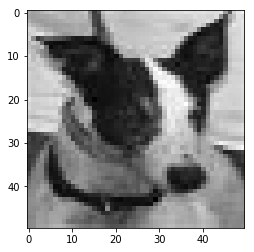

this is dog with 81.44  percent probablity


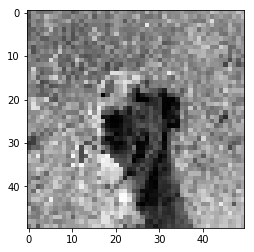

this is dog with 58.08  percent probablity


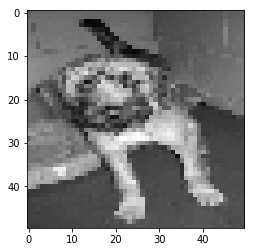

this is dog with 59.96  percent probablity


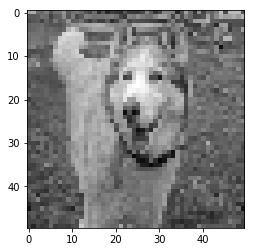

In [28]:
import matplotlib.pyplot as plt

# if you need to create the data:
#test_data = process_test_data()
# if you already have some saved:
test_data = np.load('D:/machine learning AZ/cat dogs/test_data.npy')
fig=plt.figure()
i = 5

for img_data in test_data:
    
    if i > 0 :
        i= i-1
        plt.clf()
        orig = img_data[0]
        plt.imshow(orig,cmap='gray')
        predictionFinal = classifier.predict(orig.reshape(-1,IMG_SIZE,IMG_SIZE,1), verbose=0)
        print("this is dog with" , round(float(predictionFinal)*100,2) , " percent probablity")
        plt.show()
        #break

list